# Creating a Dataset of Faces

The initial dataset comes from the [Facial Expression Comparison](https://research.google/tools/datasets/google-facial-expression/) dataset which consists of 'face image triplets along with human annotations that specify which two faces in each triplet form the most similar pair in terms of facial expression.' The faces are also identified in the image by an upper left and lower right coordinate and so need to be extracted and resized which I do below.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fec_path = "./FEC_dataset/faceexp-comparison-data-test-public.csv"
# Sample is the first 10 lines of the file above
sample_path = "./FEC_dataset/sample.csv" 

data = pd.read_csv(sample_path, header=None)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm4.staticflickr.com/3372/5791826985_...,0.523734,0.675633,0.155660,0.419811,...,300701,3,321902,3,322102,3,4294978797,3,4294989896,3
1,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm6.staticflickr.com/5532/11255277973...,0.302734,0.568359,0.060150,0.535338,...,300701,1,300901,3,321501,3,321902,2,322102,3
2,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm1.staticflickr.com/1/186137601_d1b8...,0.311558,0.444724,0.178711,0.298828,...,291701,3,300701,3,321501,3,321601,3,321902,3
3,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm8.staticflickr.com/7345/11272369166...,0.185547,0.260742,0.146245,0.263505,...,291701,2,321902,3,322102,2,4294989896,2,48316,3
4,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm4.staticflickr.com/3760/13641363095...,0.408854,0.518229,0.277344,0.372070,...,291701,2,321601,1,322102,2,4294989896,2,48316,2
5,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm2.staticflickr.com/1183/1443593385_...,0.566406,0.688477,0.610677,0.799479,...,300701,3,300901,3,321601,2,322102,1,4294989896,1
6,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm8.staticflickr.com/7027/6715442755_...,0.341463,0.740418,0.000000,0.372857,...,321601,2,322102,2,4294978797,3,4294989896,2,48316,1
7,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm4.staticflickr.com/3671/9865480994_...,0.539062,0.654297,0.250366,0.450952,...,321902,1,41207,1,4294978797,1,4294989896,3,48316,1
8,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm2.staticflickr.com/1369/5108165645_...,0.450000,0.646250,0.278719,0.623352,...,300901,1,321601,1,321902,3,322102,1,4294978797,3
9,http://farm4.staticflickr.com/3679/12137399835...,0.453125,0.655273,0.079019,0.407357,http://farm3.staticflickr.com/2400/1545630522_...,0.501953,0.574219,0.394531,0.507812,...,291701,1,300701,1,321501,2,321902,1,322102,1


In [5]:
# Add headers to 0 - 27 Columns

# a, b and c are image URLs
# a_tl_x, a_br_x, a_tl_y, a_br_y are the top-left and bottom-right coordinates of the face bounding box:
#
# a_tl_x = a_top-left_x-coord
# a_br_y = a_bottom-right_y-coord

# Annotators are the big-fice personality scores attached to the images


data.columns = ["a", "a_tl_x", "a_br_x", "a_tl_y", "a_br_y",
                "b", "b_tl_x", "b_br_x", "b_tl_y", "b_br_y",
                "c", "c_tl_x", "c_br_x", "c_tl_y", "c_br_y",
                "triplet", "annotator", "annotator", "annotator",
                "annotator", "annotator", "annotator", "annotator",
                "annotator", "annotator", "annotator", "annotator",
                "annotator"]

In [6]:
for url in data['a']:
    print(url)

http://farm4.staticflickr.com/3679/12137399835_d9075d3194_b.jpg
http://farm4.staticflickr.com/3679/12137399835_d9075d3194_b.jpg
http://farm4.staticflickr.com/3679/12137399835_d9075d3194_b.jpg
http://farm4.staticflickr.com/3679/12137399835_d9075d3194_b.jpg
http://farm4.staticflickr.com/3679/12137399835_d9075d3194_b.jpg
http://farm4.staticflickr.com/3679/12137399835_d9075d3194_b.jpg
http://farm4.staticflickr.com/3679/12137399835_d9075d3194_b.jpg
http://farm4.staticflickr.com/3679/12137399835_d9075d3194_b.jpg
http://farm4.staticflickr.com/3679/12137399835_d9075d3194_b.jpg
http://farm4.staticflickr.com/3679/12137399835_d9075d3194_b.jpg


In [7]:
# Download images

import os
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

try:
    os.mkdir('imgs')
except OSError as e:
    # Folder exists
    print(e)



for letter in ['b', 'c']: # 'a' is 10 pictures of the same thing
    counter = 0
    num_imgs = len(data[letter])
    for i in range(num_imgs):
        name = letter + '%03d.jpg' % counter
        url = data[letter][i]
        print(name, end='\r')
        try:
            urllib.request.urlretrieve(url, os.path.join('imgs', name))
        except:
            print("skipping this one...")
        
        counter += 1

[Errno 17] File exists: 'imgs'
skipping this one...


['imgs/c002.jpg', 'imgs/c003.jpg', 'imgs/c001.jpg', 'imgs/c000.jpg', 'imgs/c004.jpg', 'imgs/c005.jpg', 'imgs/c007.jpg', 'imgs/c006.jpg', 'imgs/b009.jpg', 'imgs/b008.jpg', 'imgs/b000.jpg', 'imgs/b001.jpg', 'imgs/b002.jpg', 'imgs/b006.jpg', 'imgs/b007.jpg', 'imgs/b005.jpg', 'imgs/b004.jpg', 'imgs/c008.jpg', 'imgs/c009.jpg']


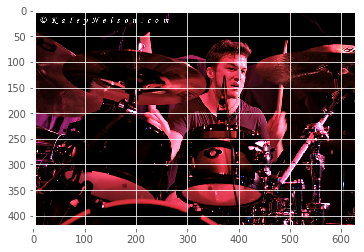

In [8]:
# Renaming all images to include the directory, and putting them in an array called files

images = os.listdir('imgs')
# img = plt.imread(os.path.join('imgs', images[0]))

files = [os.path.join('imgs', file_i) for file_i in images if '.jpg' in file_i]
files = list(reversed(files))
print(files)
img = plt.imread(files[10])
plt.imshow(img)

In [9]:
img.shape

(424, 632, 3)

In [10]:
# Cropping the head from the first image

h = img.shape[0]
w = img.shape[1]
tl_x = int(round(data['b_tl_x'][0]*w))
br_x = int(round(data['b_br_x'][0]*w))
tl_y = int(round(data['b_tl_y'][0]*h))
br_y = int(round(data['b_br_y'][0]*h))

print(tl_x, br_x, tl_y, br_y)

head_width = br_x - tl_x
head_height = br_y - tl_y

print(head_width, head_height)

331 427 66 178
96 112


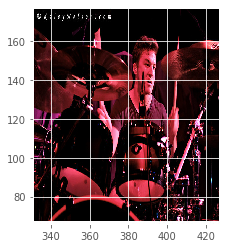

In [11]:
plt.imshow(img, extent=[tl_x, br_x, tl_y, br_y])

In [12]:
# The first image used to be a drummer, which is the reason for the following variable name...

drummer_data = np.array(img)

In [13]:
drummer_data.shape

(424, 632, 3)

In [14]:
drummer_face = drummer_data[tl_y:br_y, tl_x:br_x]

(112, 96, 3)

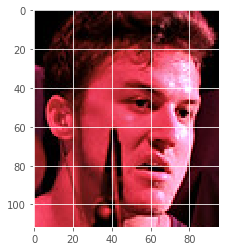

In [15]:
plt.imshow(drummer_face)
drummer_face.shape

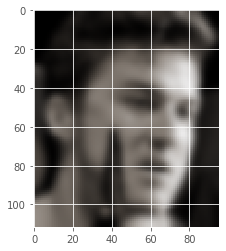

In [16]:
from scipy import misc, ndimage
face = misc.face(gray=True).astype(float)

blurred_f = ndimage.gaussian_filter(drummer_face, 2)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 3
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.imshow(blurred_f)

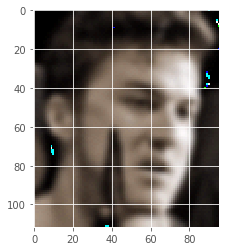

In [17]:
plt.imshow(sharpened)

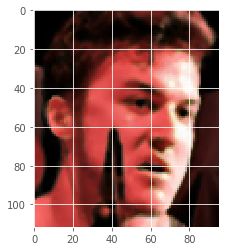

In [18]:
# DE-NOISING
med_denoised = ndimage.median_filter(drummer_face, 3)
plt.imshow(med_denoised)

## Cropping Faces

In [19]:
# Crop the head out of every image and put into faces[]

faces = []

for file in files:
    img = plt.imread(file)

    h = img.shape[0]
    w = img.shape[1]
    
    image_data = np.array(img)
    
    ch = file[5]
    num = int(file[7:9])

    tl_x = int(round(data[ch+'_tl_x'][num]*w))
    br_x = int(round(data[ch+'_br_x'][num]*w))
    tl_y = int(round(data[ch+'_tl_y'][num]*h))
    br_y = int(round(data[ch+'_br_y'][num]*h))
    
    
    face = image_data[tl_y:br_y, tl_x:br_x]
    faces.append(face)

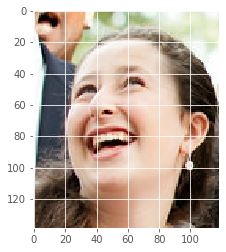

In [20]:
plt.imshow(faces[0])

In [21]:
# Each face is now cropped, but you can see below that each crop is a different size (shape)
face_data = np.array(faces)
for face in face_data:
    print(face.shape)

(139, 119, 3)
(379, 369, 3)
(81, 70, 3)
(119, 102, 3)
(112, 96, 3)
(161, 139, 3)
(196, 169, 3)
(353, 280, 3)
(87, 74, 3)
(183, 157, 3)
(112, 96, 3)
(316, 272, 3)
(123, 106, 3)
(261, 229, 3)
(137, 118, 3)
(145, 125, 3)
(97, 84, 3)
(97, 83, 3)
(114, 98, 3)


## Resizing Faces

In [22]:
largest_y = 0
largest_x = 0

average_y = 0
average_x = 0

for face in face_data:
    largest_y = max(largest_y, face.shape[0])
    average_y += face.shape[0]
    largest_x = max(largest_x, face.shape[1])
    average_x += face.shape[1]
    
print("largest_y: {0}, largest_x: {1}".format(largest_y, largest_x))
average_y /= len(face_data)
average_x /= len(face_data)

average_y = round(average_y)
average_x = round(average_x)
print("average_y: {0}, average_x: {1}".format(average_y, average_x))

largest_y: 379, largest_x: 369
average_y: 169, average_x: 147


In [26]:
# Resizing images

import cv2

res = cv2.resize(face_data[0], dsize=(300, 140), interpolation=cv2.INTER_CUBIC)

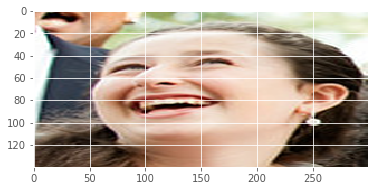

In [27]:
plt.imshow(res)

In [34]:
resized_faces = []

for face in face_data:
    resized_faces.append(cv2.resize(face, dsize=(average_x, average_y), interpolation=cv2.INTER_CUBIC))

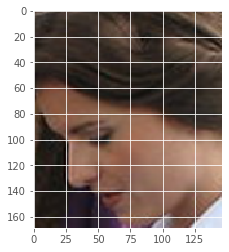

In [36]:
plt.imshow(resized_faces[8])

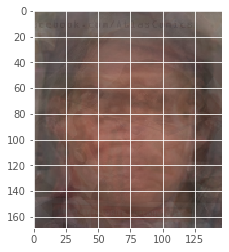

In [38]:
# Mean Image
mean_img = np.mean(resized_faces, axis=0)

plt.imshow(mean_img.astype(np.uint8))

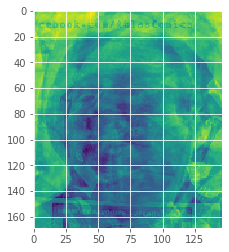

In [41]:
std_img = np.std(resized_faces, axis=0)
#plt.imshow(std_img.astype(np.uint8))
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8))

In [42]:
# De-Noising every image
denoised = []
for face in resized_faces:
    denoised.append(ndimage.median_filter(face, 3))

DE-NOISED MEAN


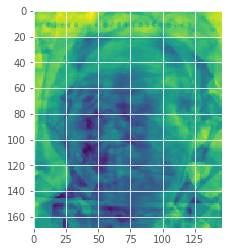

In [47]:
std_img = np.std(denoised, axis=0)
#plt.imshow(std_img.astype(np.uint8))
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8))
print("DE-NOISED MEAN")